First, we need to load all of our libraries we will use for this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style='white', context='notebook', palette='deep')

In [ ]:
dataset = pd.read_csv("Expense.csv")
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K


Next, we load our data.

In [ ]:
dataset.shape

(5000, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


* Summary of the dataset shows that there are no missing values. But the preview shows that the dataset contains values coded as `?`. So, I will encode `?` as NaN values.

In [ ]:
dataset.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.656000,10.065000,1104.080000,90.032800,40.566200
std,13.698292,2.558141,7579.674371,404.168991,12.154191
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3004.000000,99.000000


In [ ]:
for i in range(dataset.shape[1]):
    if (dataset.iloc[:,i].dtype == 'object') or (dataset.iloc[:,i].dtype =='int32'):
        print("Number of catedgories in " , dataset.columns[i] , "is " , len(dataset.iloc[:,i].unique()))
        print("Frequency of each categories in " , dataset.columns[i] , "is " , dataset.iloc[:,i].value_counts()/len(dataset.iloc[:,i]))

Number of catedgories in  workclass is  9
Frequency of each categories in  workclass is   Private             0.6888
 Self-emp-not-inc    0.0770
 ?                   0.0640
 Local-gov           0.0636
 State-gov           0.0398
 Self-emp-inc        0.0368
 Federal-gov         0.0296
 Without-pay         0.0002
 Never-worked        0.0002
Name: workclass, dtype: float64
Number of catedgories in  education is  16
Frequency of each categories in  education is   HS-grad         0.3204
 Some-college    0.2284
 Bachelors       0.1646
 Masters         0.0518
 Assoc-voc       0.0428
 11th            0.0358
 Assoc-acdm      0.0314
 10th            0.0312
 7th-8th         0.0210
 Prof-school     0.0180
 9th             0.0168
 12th            0.0114
 Doctorate       0.0112
 5th-6th         0.0092
 1st-4th         0.0050
 Preschool       0.0010
Name: education, dtype: float64
Number of catedgories in  marital-status is  7
Frequency of each categories in  marital-status is   Married-civ-spouse   

In [ ]:
dataset[dataset == ' ?'] = np.nan

In [ ]:
dataset.isnull().sum()

age                 0
workclass         320
education           0
education-num       0
marital-status      0
occupation        321
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     98
Expense             0
dtype: int64

In [ ]:
for i in range(dataset.shape[1]):
    print("Percentage of Null value in " , dataset.columns[i] , "is " , (dataset.iloc[:,i].isnull().sum())/dataset.shape[0])

Percentage of Null value in  age is  0.0
Percentage of Null value in  workclass is  0.064
Percentage of Null value in  education is  0.0
Percentage of Null value in  education-num is  0.0
Percentage of Null value in  marital-status is  0.0
Percentage of Null value in  occupation is  0.0642
Percentage of Null value in  relationship is  0.0
Percentage of Null value in  race is  0.0
Percentage of Null value in  sex is  0.0
Percentage of Null value in  capital-gain is  0.0
Percentage of Null value in  capital-loss is  0.0
Percentage of Null value in  hours-per-week is  0.0
Percentage of Null value in  native-country is  0.0196
Percentage of Null value in  Expense is  0.0


* Encode ? as NaNs

In [ ]:
dataset[dataset == ' ?'] = np.nan

In [ ]:
dataset[dataset == ' ?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Again check the summary of dataframe

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       4680 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      4679 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  4902 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


* Now, the summary shows that the variables - workclass, occupation and native.country contain missing values. All of these variables are categorical data type. So, we will impute the missing values with the most frequent value- the mode.

In [ ]:
dataset.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Expense'],
      dtype='object')

###### Do variables have outliers? 


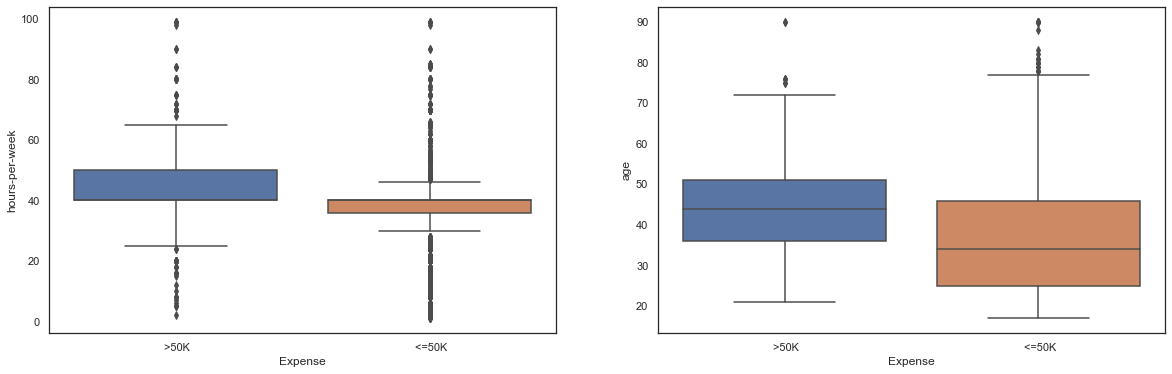

In [ ]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours-per-week',x='Expense',data=dataset,ax=a)
sns.boxplot(y='age',x='Expense',data=dataset,ax=b)


##### Target distributed evenly

In [ ]:
dataset['Expense'].unique()

array([' >50K', ' <=50K'], dtype=object)

In [ ]:
dataset['Expense']=dataset['Expense'].map({' <=50K': 0, ' >50K': 1})

In [ ]:
dataset['Expense'].value_counts()

0    3776
1    1224
Name: Expense, dtype: int64

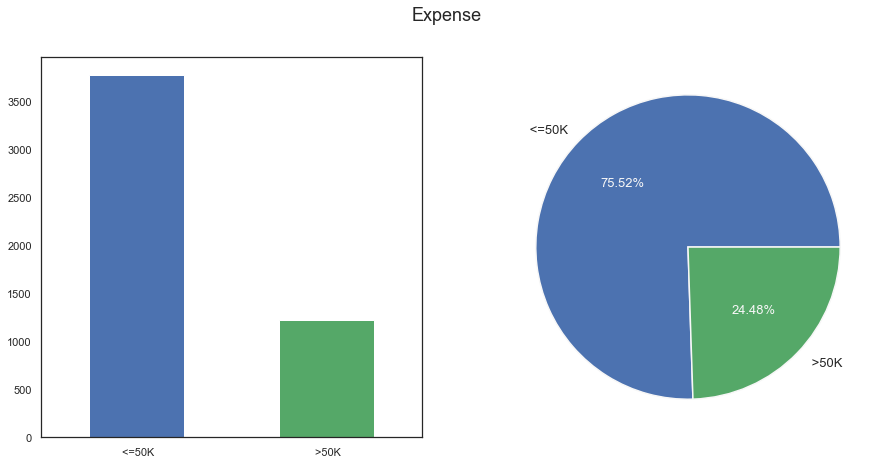

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Expense", fontsize = 18.)
_ = dataset.Expense.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = [" <=50K", " >50K"])
_ = dataset.Expense.value_counts().plot.pie(labels = (" <=50K", " >50K"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

#### Impute missing values with mode

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [ ]:
dataset.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

* Now we can see that there are no missing values in the dataset.

In [ ]:
df1 = dataset[(dataset['hours-per-week']>dataset['hours-per-week'].quantile(0.75)) 
              & (dataset['age']> dataset['age'].quantile(0.75))]
df1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,1
9,54,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,52,United-States,1
26,56,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,0
54,52,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,1
65,49,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,80,United-States,1


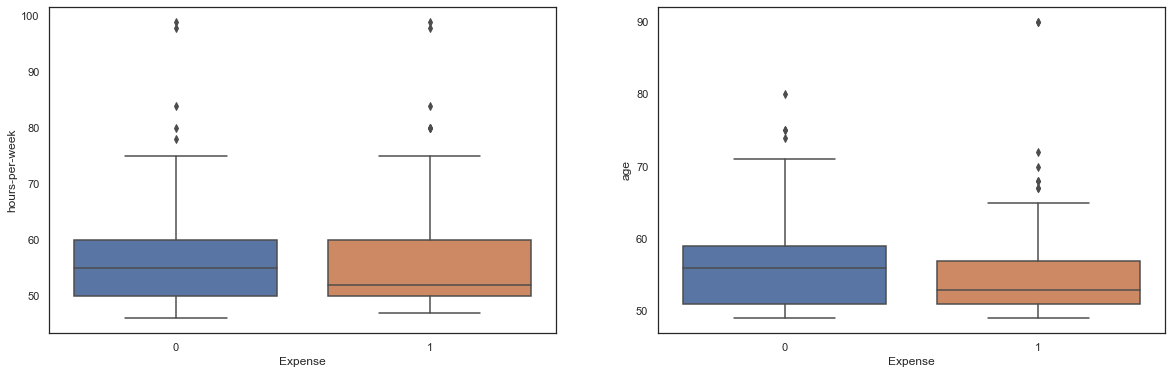

In [ ]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours-per-week',x='Expense',data=df1,ax=a)
sns.boxplot(y='age',x='Expense',data=df1,ax=b)

We will resolve the problem of class distribution for target variable while splitting the data into training and test data.

#### Correlation Matrix for Numeric Data

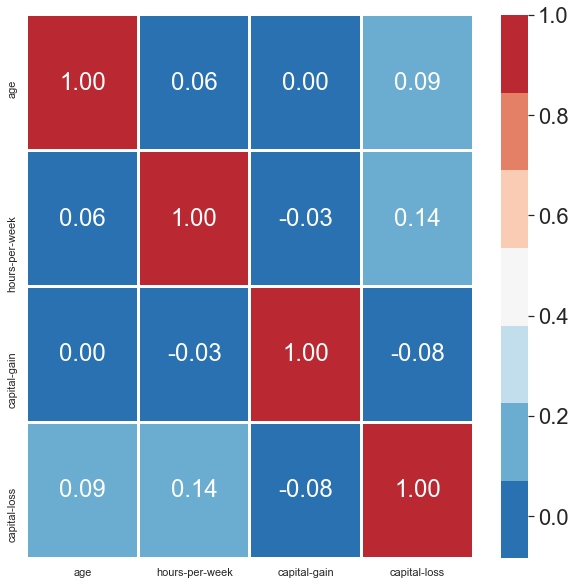

In [ ]:
numeric_columns = ['age','hours-per-week','capital-gain','capital-loss']

fig, axe = plt.subplots(figsize=(10,10))
sns.set_context("poster")
sns.set(font_scale=2)
map1 = sns.color_palette("RdBu_r", 7)
sns.heatmap(df1[numeric_columns].corr(),annot=True, fmt='.2f',linewidths=2,cmap = map1)

* The heatmap indicates that the 
Age , hours.per.week , capital.gain & capital.loss are independept of each other

#### Feature Engineering

In [ ]:
dataset.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Expense'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['occupation1'] = label_encoder.fit_transform(dataset.occupation)
dataset['workclass1'] = label_encoder.fit_transform(dataset.workclass)
dataset['relationship1'] = label_encoder.fit_transform(dataset.relationship)
dataset['race1'] = label_encoder.fit_transform(dataset.race)
dataset['native-country1'] = label_encoder.fit_transform(dataset['native-country'])
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['marital-status1'] = label_encoder.fit_transform(dataset['marital-status'])
dataset['education1'] = label_encoder.fit_transform(dataset['education'])

In [ ]:
dataset['marital-status1'] = label_encoder.fit_transform(dataset['marital-status'])
dataset['education1'] = label_encoder.fit_transform(dataset['education'])

In [ ]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,hours-per-week,native-country,Expense,occupation1,workclass1,relationship1,race1,native-country1,marital-status1,education1
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,15024,...,50,United-States,1,3,4,0,4,36,2,9
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,1,0,...,40,United-States,0,7,3,3,4,36,4,15
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,1,0,...,65,United-States,1,9,3,0,4,36,2,10
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,0,0,...,40,United-States,1,9,6,5,4,36,2,11
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,0,0,...,60,United-States,0,9,1,3,4,36,4,9


In [ ]:
dataset.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Expense',
       'occupation1', 'workclass1', 'relationship1', 'race1',
       'native-country1', 'marital-status1', 'education1'],
      dtype='object')

In [ ]:
Y=dataset.Expense
X=dataset[['age', 'education-num','sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country1', 
           'occupation1', 'workclass1', 'relationship1',
       'race1', 'marital-status1', 'education1']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,stratify = Y,random_state=0)

In [ ]:
y_train.value_counts()

0    2643
1     857
Name: Expense, dtype: int64

In [ ]:
y_test.value_counts()

0    1133
1     367
Name: Expense, dtype: int64

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = GaussianNB()
dt_default.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1133
           1       0.68      0.34      0.45       367

    accuracy                           0.80      1500
   macro avg       0.75      0.64      0.66      1500
weighted avg       0.78      0.80      0.77      1500

0.7993333333333333


In [ ]:
# Convert Sex value to 0 and 1
#dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)


dataset["marital-status"] = dataset["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
dataset["marital-status"] = dataset["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
dataset["marital-status"] = dataset["marital-status"].map({"Married":1, "Single":0})
dataset["marital-status"] = dataset["marital-status"].astype(int)

# Drop the data you don't want to use
#dataset.drop(labels=['Survey I.D.'], axis = 1, inplace = True)
#print('Dataset with Dropped Labels')
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,hours-per-week,native-country,Expense,occupation1,workclass1,relationship1,race1,native-country1,marital-status1,education1
0,39,Self-emp-inc,Bachelors,13,1,Exec-managerial,Husband,White,1,15024,...,50,United-States,1,3,4,0,4,36,2,9
1,20,Private,Some-college,10,0,Other-service,Own-child,White,1,0,...,40,United-States,0,7,3,3,4,36,4,15
2,50,Private,Doctorate,16,1,Prof-specialty,Husband,White,1,0,...,65,United-States,1,9,3,0,4,36,2,10
3,38,State-gov,HS-grad,9,1,Prof-specialty,Wife,White,0,0,...,40,United-States,1,9,6,5,4,36,2,11
4,23,Local-gov,Bachelors,13,0,Prof-specialty,Own-child,White,0,0,...,60,United-States,0,9,1,3,4,36,4,9


In [ ]:
dataset["marital-status"].unique()

array([1, 0])

###### Barplot of Workclass vs Income

Text(0.5, 0, 'Workclass')

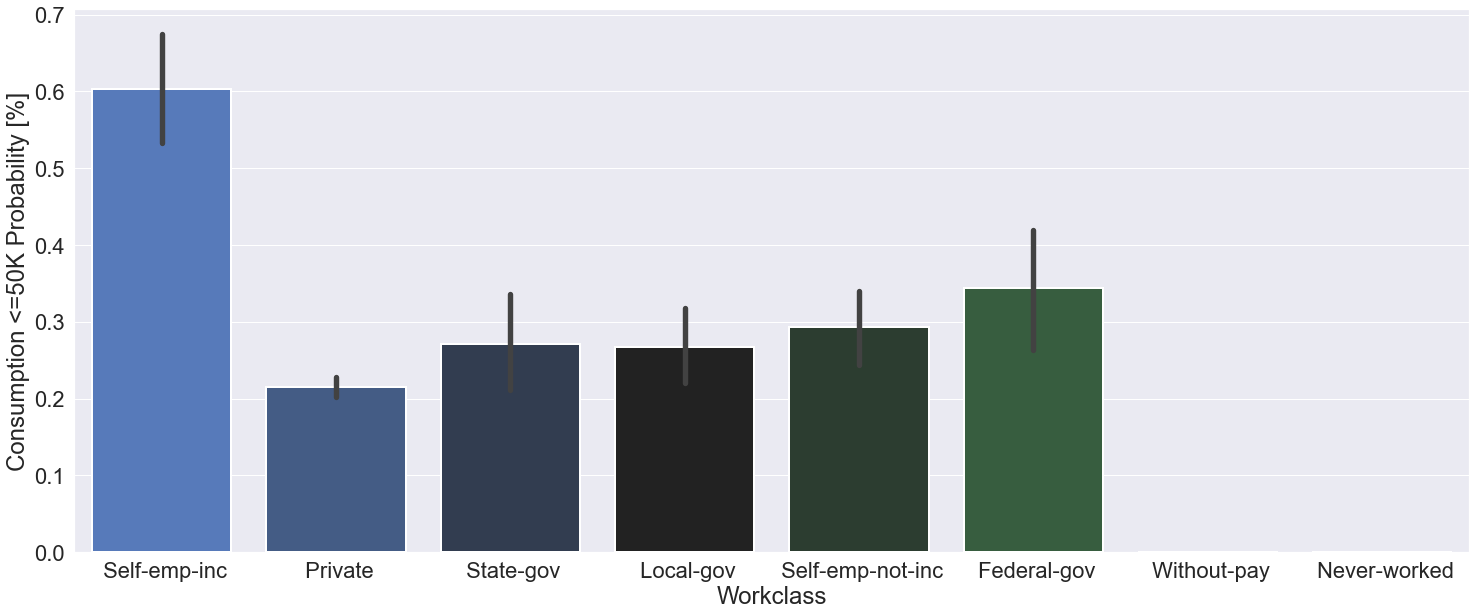

In [ ]:
([" ?"],'Unknown')
fig, ax = plt.subplots(figsize=(25,10))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=50, n=7, center="dark")

fig = sns.barplot(x='workclass',y='Expense',data=dataset,palette=current_palette)

fig.set_ylabel("Consumption <=50K Probability [%]")
fig.set_xlabel("Workclass")

    * From the barplot of Workclass vs Consumption we see from high to low that self-emp-inc has the highest chance of being in Group-B with a 54% chance, while the last known workclass(private) has a 22% of being in Group-B.


In [ ]:
dataset['workclass'].unique()

array([' Self-emp-inc', ' Private', ' State-gov', ' Local-gov',
       ' Self-emp-not-inc', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

##### Barplot of Marital Status vs Expense

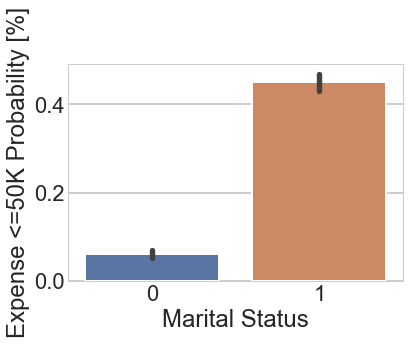

In [ ]:
plt.style.use('seaborn-whitegrid')
sns.barplot(x='marital-status',y='Expense',data=dataset)
plt.ylabel("Expense <=50K Probability [%]")
plt.xlabel("Marital Status")

datasetCopy= dataset.copy()
datasetCopy["marital-status"] = datasetCopy["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], '1')
datasetCopy["marital-status"] = datasetCopy["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], '0')
datasetCopy["marital-status"] = datasetCopy["marital-status"].astype(int)

plt.show()

* From the first barplot of Marital Status vs Consumption, we see that, from high to low, Married-civ-spouse has the lowest probability of having an Consumption of <=50K with a 43% chance, while Never-married has the lowest, with a 5% chance of consuming of <=50K.


* From the second barplot ofMarital Status vs Income plot, we can see a wide discrepancy in probability of earning a higher income based on marital status. Married adults on average have a 45% probability of earning over 50k , while single adults possess only a 7% probability of consumption of <=50K.



##### Barplot of Relationship vs Income

In [ ]:
dataset['relationship'].unique()

array([' Husband', ' Own-child', ' Wife', ' Not-in-family', ' Unmarried',
       ' Other-relative'], dtype=object)

Text(0.5, 0, 'Relationship')

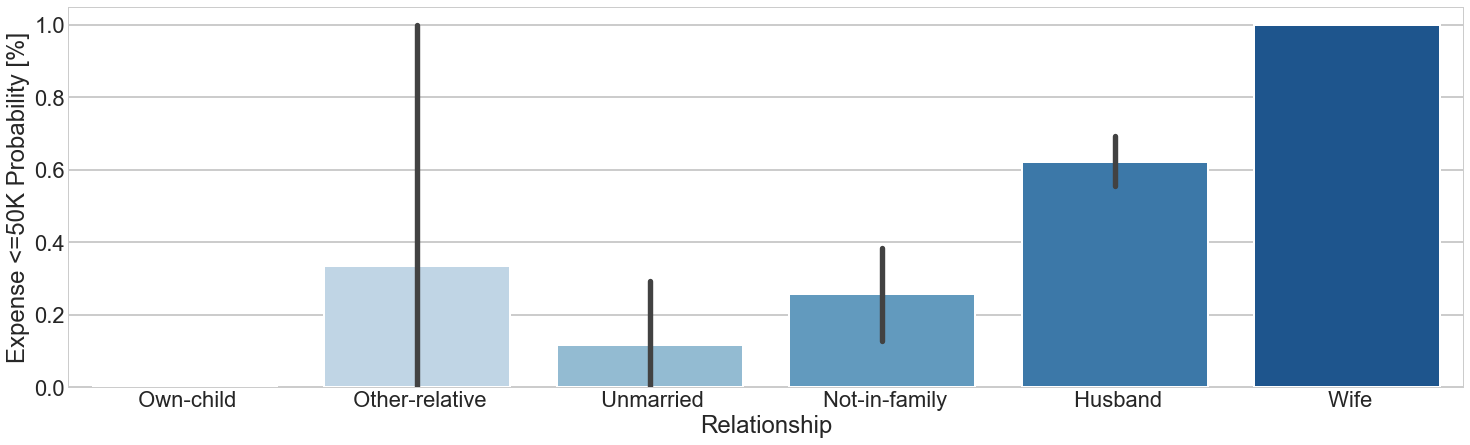

In [ ]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set_context("poster")
current_palette = sns.color_palette("Blues")

fig = sns.barplot(x='relationship',y='Expense',data=df1, order=[' Own-child',' Other-relative',' Unmarried',' Not-in-family',' Husband',' Wife'], palette=current_palette)

fig.set_ylabel("Expense <=50K Probability [%]")
fig.set_xlabel("Relationship")

* From the barplot of Relationship vs Consumption, we see that, from high to low, Wife has the highest probability of being in Group-B with a 47% chance, while Own-child has the lowest, with a 1% chance of being in <=50K.


* This plot clearly shows that wives and husbands consecutively have the highest probabilities of being in Group-B. This data agrees with the outcome of the previous barplot of Marital Status vs Consumption, which is that, in general, married people are more likely to be in <=50K, while single people are significantly less likely of being in <=50K.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['marital-status2'] = label_encoder.fit_transform(dataset['marital-status'])

In [ ]:
Y=dataset.Expense
X=dataset[['age', 'education-num','sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country1', 
           'occupation1', 'workclass1', 'relationship1',
       'race1', 'marital-status2', 'education1']]

In [ ]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,native-country,Expense,occupation1,workclass1,relationship1,race1,native-country1,marital-status1,education1,marital-status2
0,39,Self-emp-inc,Bachelors,13,1,Exec-managerial,Husband,White,1,15024,...,United-States,1,3,4,0,4,36,2,9,1
1,20,Private,Some-college,10,0,Other-service,Own-child,White,1,0,...,United-States,0,7,3,3,4,36,4,15,0
2,50,Private,Doctorate,16,1,Prof-specialty,Husband,White,1,0,...,United-States,1,9,3,0,4,36,2,10,1
3,38,State-gov,HS-grad,9,1,Prof-specialty,Wife,White,0,0,...,United-States,1,9,6,5,4,36,2,11,1
4,23,Local-gov,Bachelors,13,0,Prof-specialty,Own-child,White,0,0,...,United-States,0,9,1,3,4,36,4,9,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,stratify = Y,random_state=0)

In [ ]:
X_train.describe()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country1,occupation1,workclass1,relationship1,race1,marital-status2,education1
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,38.630857,10.063714,0.673143,1047.093429,87.524571,40.654286,34.352000,5.772571,3.082571,1.433429,3.662286,0.474286,10.306000
std,13.670364,2.529551,0.469132,6985.994506,399.293846,12.075542,6.108487,4.016434,1.108972,1.594637,0.856163,0.499410,3.907814
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,0.000000,40.000000,36.000000,2.000000,3.000000,0.000000,4.000000,0.000000,9.000000
50%,37.000000,10.000000,1.000000,0.000000,0.000000,40.000000,36.000000,6.000000,3.000000,1.000000,4.000000,0.000000,11.000000
75%,48.000000,12.000000,1.000000,0.000000,0.000000,45.000000,36.000000,9.000000,3.000000,3.000000,4.000000,1.000000,12.000000
max,90.000000,16.000000,1.000000,99999.000000,3004.000000,99.000000,38.000000,13.000000,7.000000,5.000000,4.000000,1.000000,15.000000


In [ ]:
X_test.describe()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country1,occupation1,workclass1,relationship1,race1,marital-status2,education1
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,38.714667,10.068000,0.678667,1237.048667,95.885333,40.360667,34.385333,5.611333,3.123333,1.477333,3.669333,0.470000,10.315333
std,13.767629,2.624494,0.467144,8811.886493,415.398278,12.337371,6.045264,4.094319,1.091597,1.624986,0.840911,0.499266,3.870127
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,9.000000,0.000000,0.000000,0.000000,40.000000,36.000000,2.000000,3.000000,0.000000,4.000000,0.000000,9.000000
50%,37.000000,10.000000,1.000000,0.000000,0.000000,40.000000,36.000000,5.000000,3.000000,1.000000,4.000000,0.000000,11.000000
75%,48.000000,12.000000,1.000000,0.000000,0.000000,45.000000,36.000000,9.000000,3.000000,3.000000,4.000000,1.000000,13.000000
max,90.000000,16.000000,1.000000,99999.000000,2559.000000,99.000000,37.000000,13.000000,6.000000,5.000000,4.000000,1.000000,15.000000


In [ ]:
y_train.value_counts()

0    2643
1     857
Name: Expense, dtype: int64

In [ ]:
y_test.value_counts()

0    1133
1     367
Name: Expense, dtype: int64

## Naive Bayes

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = GaussianNB()
dt_default.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1133
           1       0.69      0.37      0.48       367

    accuracy                           0.80      1500
   macro avg       0.76      0.66      0.68      1500
weighted avg       0.79      0.80      0.78      1500

0.8046666666666666


The overall accuracy is 80.46%. The fit is quite good. As we both the classes of target variable >50K & <=50K are of same importance, we may look into the accuracy as the evaluation matrix of the problem or we can look it the weigthed average f1-score.

Weigthed average f1-score is 78 % & Accuracy is 80%

We can conclude that the overall fit is quite good.


The precison of the base model is 79% with a recall value of 80% 

F1-score is 79% 

#Cohens kappa - The kappa statistic is frequently used to test interrater reliability. The importance of rater reliability lies in the fact that it #represents

The extent to which the data collected in the study are correct representations of the variables measured.

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred_default)

0.37133817000045777

Kappa score is .371

##### How do you improve the accuracy of the model? 

The model we hvae consider is a basic model.There are various methods of improving the accuracy such as ,
i. We can tune the parameters.
ii. We may prepare the data better and so on.

##### Write clearly the changes that you will make before re-fitting the model.

One of the reason behind the under-performance of the model could be the insufficient proportion of diffrent classes in target variable i.e. >50K & <=50K.

We would apply the SMoTE technique on the training set.
Using SMoTE technique, we can generate the number of observation in the >50K class in the target variable.

## SMOTE

In [ ]:
# Applying SMoTE on the training set
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train,y_train = smt.fit_sample(X_train,y_train)

In [ ]:
y_train.value_counts()

1    2643
0    2643
Name: Expense, dtype: int64

## Naive Bayes

In [ ]:
dt_default = GaussianNB()
dt_default.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1133
           1       0.67      0.44      0.54       367

    accuracy                           0.81      1500
   macro avg       0.76      0.69      0.71      1500
weighted avg       0.80      0.81      0.80      1500

0.8113333333333334


As even after applying SMoTE the model did not improve, now,we need to think about applying a different model.

We would fit Decision Tree on the dataset

## Decision Tree

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1133
           1       0.57      0.61      0.59       367

    accuracy                           0.79      1500
   macro avg       0.72      0.73      0.72      1500
weighted avg       0.80      0.79      0.79      1500

0.792


## Logistic Regression

In [ ]:
import statsmodels
import statsmodels.api as sm

In [ ]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.469646
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 5286
Model:                          Logit   Df Residuals:                     5273
Method:                           MLE   Df Model:                           12
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:                  0.3224
Time:                        12:51:28   Log-Likelihood:                -2482.5
converged:                       True   LL-Null:                       -3664.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0108      0.003      3.918      0.000       0.005       0.016
education-num 

In [ ]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

2315    0.160602
4585    0.777612
2829    0.309593
3888    0.401564
1081    0.217180
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [ ]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 1, 0, 0, 0]

#### Plot the confusion matrix.

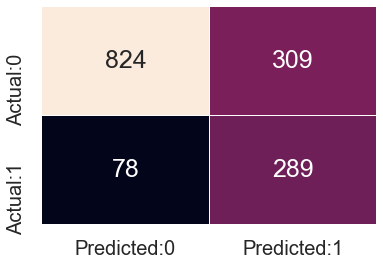

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [ ]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [ ]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.48327759197324416

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [ ]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.7874659400544959

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [ ]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.7272727272727273

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [ ]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.5989637305699481

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [ ]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.742

**Interpretation:** For our dataset, both the values for accuracy and f1-score are equal. We can say that our model is 74.2% accurate.

## K-Nearest Neighbour

In [ ]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 7)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

#### Create a generalized function to calculate the performance metrics for the test set.

In [ ]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

#### Define a function to plot the confusion matrix.

In [ ]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Define a function to plot the ROC curve.

In [ ]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

#### Build a confusion matrix.

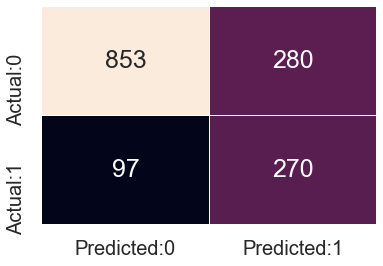

In [ ]:
# call the function to plot the confusion matrix
# pass the knn model to the function
plot_confusion_matrix(knn_model)

**Calculate performance measures on the test set.**

In [ ]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1133
           1       0.49      0.74      0.59       367

    accuracy                           0.75      1500
   macro avg       0.69      0.74      0.70      1500
weighted avg       0.80      0.75      0.76      1500



**Interpretation:** The accuracy is 75% for this model.

**Plot the ROC curve.**

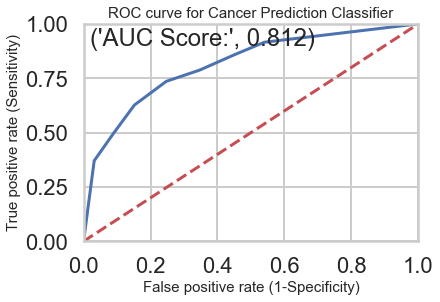

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (knn_model with n_neighbors = 7) is away from the dotted line; with the AUC score 0.812.

### Optimal Value of K (using GridSearchCV)

In [ ]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



#### Draw a line plot to see the error rate for each value of K using euclidean distance as a metric of KNN model

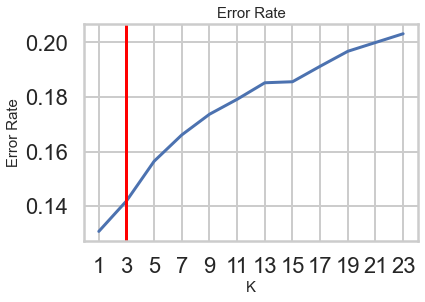

In [ ]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 3, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the optimal value of K (= 1) obtained from the GridSearchCV() results in a lowest error rate. 

**Calculate performance measures on the test set.**

In [ ]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1133
           1       0.55      0.63      0.58       367

    accuracy                           0.78      1500
   macro avg       0.71      0.73      0.72      1500
weighted avg       0.79      0.78      0.79      1500



**Plot the ROC curve.**

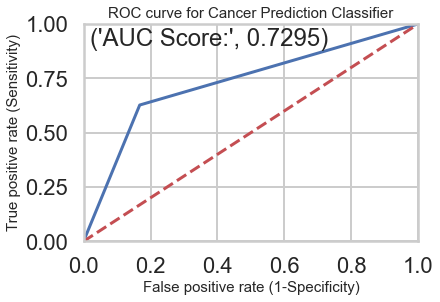

In [ ]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_grid)

**Interpretation:** From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) is away from the red dotted line; with the AUC score 0.7295.

## Comparison Between models

In [ ]:
#This is a classical classification problem. F1 score, Precison Recall would be the right metric for evaluation 
# Oversampling the minority class has increasd the performance of the base model
# The key risk in this above method is oversampling as it makes the model to overfit 
# Using better and heavy classifiers can improve the accuracy, and good amount parameter optimization

In [ ]:
outcome = []
Modelnames = []
models = []
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50, max_features=4)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1)))


## XGBoost Classifier

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
kfoldCV = StratifiedKFold(n_splits=5, random_state=20)
xgb_model = XGBClassifier(n_estimators=250)
results = cross_val_score(xgb_model, X_train, y_train, cv=kfoldCV)
print("XGBClassifier: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
outcome.append(results)
Modelnames.append("XGBClassifier")

for name, model in models:
    kfoldCV = KFold(n_splits=5, random_state=0)
    cv_r = cross_val_score(model, X_train, y_train, cv=kfoldCV, scoring='accuracy')
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))

XGBClassifier: 88.67% (3.54%)
Random Forest Classifier: 87.46% (3.25%)
Decision Tree Classifier: 83.01% (2.61%)
Logistic Regression: 67.46% (4.93%)
Naive Bayes: 68.16% (17.39%)
KNN: 87.23% (3.54%)


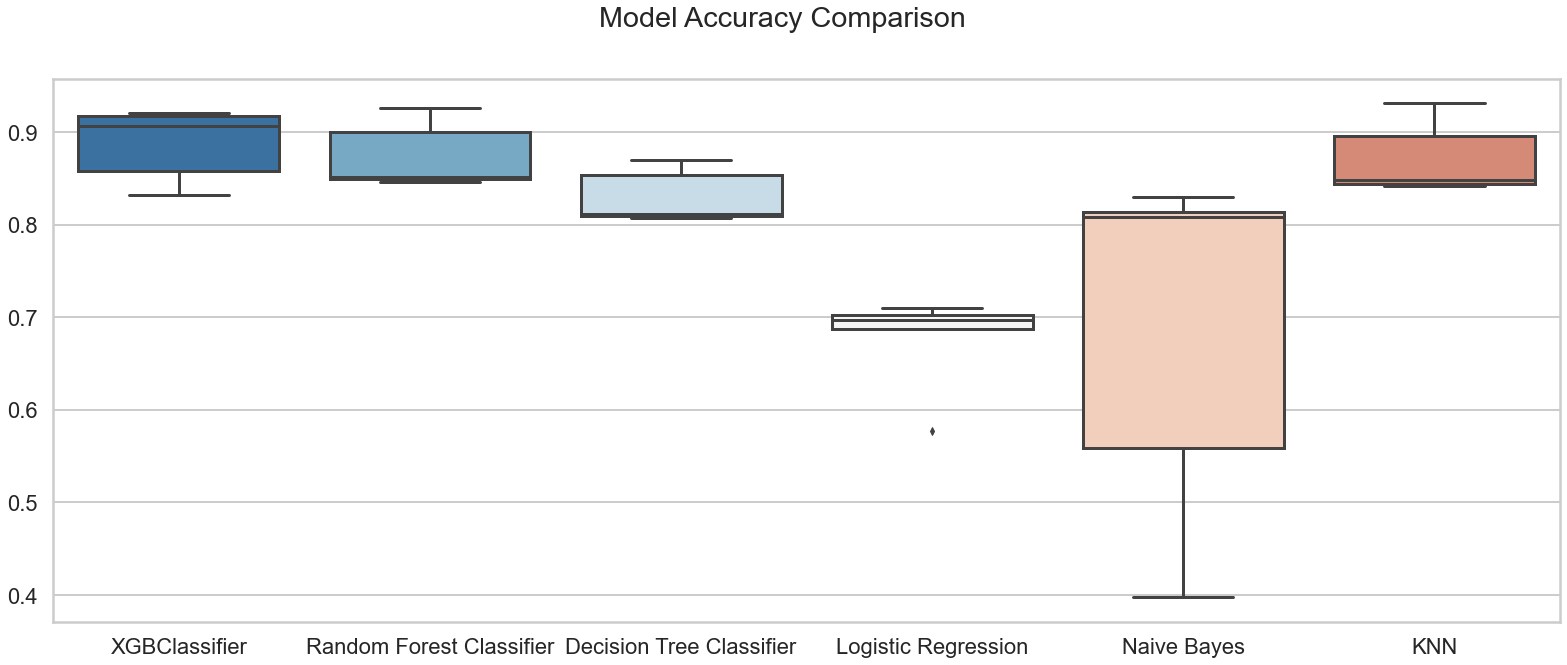

In [ ]:
fig, axe = plt.subplots(figsize=(27,10))
data1 ={'Names': Modelnames,'Results': outcome}
fig.suptitle('Model Accuracy Comparison')
current_palette = sns.color_palette("RdBu_r", 7)
sns.set_context("poster")
sns.boxplot(x='Names',y='Results',data=data1,palette = current_palette)

* We are getting the accuracy of XGBClassifier: 88.67% 

In [ ]:
models

[('Random Forest Classifier',
  RandomForestClassifier(max_features=4, n_estimators=50)),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB()),
 ('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=1))]

In [ ]:
xgb_model = XGBClassifier(n_estimators=250).fit(X_train,y_train)

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = xgb_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1133
           1       0.64      0.68      0.66       367

    accuracy                           0.83      1500
   macro avg       0.77      0.78      0.77      1500
weighted avg       0.83      0.83      0.83      1500

0.8293333333333334


##### The GradentBoost algorithm seems to perform the best for the dataset

##### The accuracy of the model is .83

#####  The average precision is .83

#####  The average recall is .83

#####  The average F1 is .83

#####  Which implies that the model is a good fit.

In [ ]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances 

,importance
relationship1,0.288539
marital-status2,0.192690
capital-gain,0.159599
capital-loss,0.056726
sex,0.046149
education1,0.044976
education-num,0.043837
workclass1,0.034053
hours-per-week,0.029692
race1,0.029291


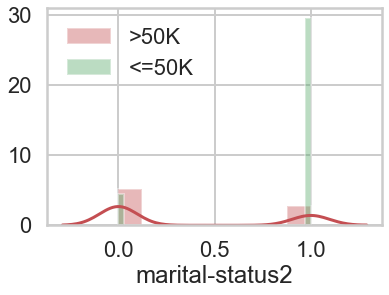

In [ ]:
sns.distplot(dataset[dataset.Expense == 0]['marital-status2'] , color = 'r',label = '>50K')
sns.distplot(dataset[dataset.Expense == 1]['marital-status2'] , color = 'g',label = '<=50K')
plt.legend()
plt.show()

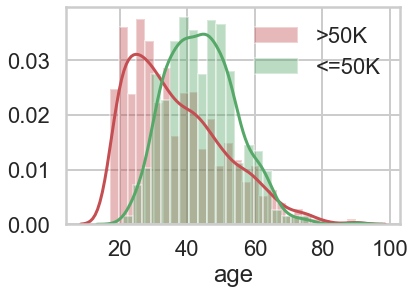

In [ ]:
sns.distplot(dataset[dataset.Expense == 0].age , color = 'r',label = '>50K')
sns.distplot(dataset[dataset.Expense == 1].age , color = 'g',label = '<=50K')
plt.legend()
plt.show()

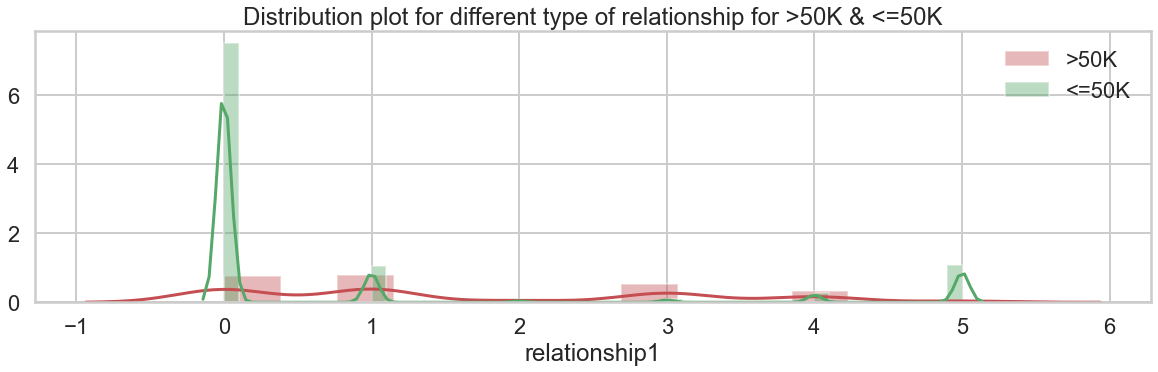

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(dataset[dataset.Expense == 0]['relationship1'] , color = 'r',label = '>50K')
sns.distplot(dataset[dataset.Expense == 1]['relationship1'], color = 'g',label = '<=50K')
plt.title('Distribution plot for different type of relationship for >50K & <=50K')
plt.legend()
plt.show()

### Conclussion :  

 `Relationship` ,`marital-status2`, `capital-gain` & `capital.loss`  have the most inpact the consumption segregation of >50K & <=50K as 28% , 19% , 15% & 5% respectively

Majority of the Married people have are more likely to belong to the >50K type.Where as single people are more likely to belong to <=50K type.


People with age greater than 40 are more likely to belong to the >50K type.Where as people with age less than 40 are more likely to belong to <=50K type.

People with `Own-child` (index 0) and `Wife`(index 5) relationship indices are more likely to belong to the >50K type.Where as People with `Other-relative`(index 1),`Not-in-family` (index 3) and `Husband` (index 4) relationship indices are more likely to belong to <=50K type.
